### 非线性反向传播

In [13]:
import numpy as np
import matplotlib.pyplot as plt

error = 1e-5
x = 2
y = 3

In [14]:
def forward(x):
    a = x*x;
    b = np.log(a)
    c = np.sqrt(b)
    print("x=%f,a=%f,b=%f,c=%f" %(x,a,b,c))
    return a,b,c

print(forward(x))

x=2.000000,a=4.000000,b=1.386294,c=1.177410
(4, 1.3862943611198906, 1.1774100225154747)


In [15]:
def backward(x,a,b,c,y):
    loss = c - y
    delta_c = loss
    delta_b = delta_c*2*np.sqrt(b)
    delta_a = delta_b*a
    delta_x = delta_a/(2*x)
    print("loss=%f,delta_x=%f,delta_a=%f,delta_b=%f,delta_c=%f"%(loss,delta_x,delta_a,delta_b,delta_c))
    return loss,delta_x

a,b,c = forward(x)
print(backward(x,a,b,c,y))

x=2.000000,a=4.000000,b=1.386294,c=1.177410
loss=-1.822590,delta_x=-4.291871,delta_a=-17.167486,delta_b=-4.291871,delta_c=-1.822590
(-1.8225899774845253, -4.291871412853067)


x=2.000000,a=4.000000,b=1.386294,c=1.177410
loss=-1.822590,delta_x=-4.291871,delta_a=-17.167486,delta_b=-4.291871,delta_c=-1.822590
x=6.291871,a=39.587646,b=3.678517,c=1.917946
loss=-1.082054,delta_x=-13.057653,delta_a=-164.314153,delta_b=-4.150642,delta_c=-1.082054
x=19.349525,a=374.404112,b=5.925336,c=2.434201
loss=-0.565799,delta_x=-26.649482,delta_a=-1031.309622,delta_b=-2.754536,delta_c=-0.565799
x=45.999007,a=2115.908617,b=7.657240,c=2.767172
loss=-0.232828,delta_x=-29.636042,delta_a=-2726.457032,delta_b=-1.288551,delta_c=-0.232828
x=75.635049,a=5720.660662,b=8.651840,c=2.941401
loss=-0.058599,delta_x=-13.036706,delta_a=-1972.063750,delta_b=-0.344727,delta_c=-0.058599
x=88.671755,a=7862.680107,b=8.969883,c=2.994976
loss=-0.005024,delta_x=-1.334153,delta_a=-236.603409,delta_b=-0.030092,delta_c=-0.005024
x=90.005908,a=8101.063482,b=8.999751,c=2.999958
loss=-0.000042,delta_x=-0.011222,delta_a=-2.020180,delta_b=-0.000249,delta_c=-0.000042
x=90.017131,a=8103.083788,b=9.000000,c=3.0000

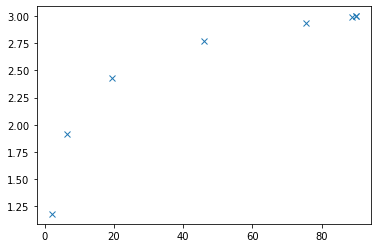

In [16]:
def main(x,y,error):
    X,Y = [],[]
    while(True):
        a,b,c = forward(x)
        X.append(x)
        Y.append(c)
        loss,delta_x = backward(x,a,b,c,y)
        if abs(loss) < error:
            break
        x = x - delta_x
    
    print("done!")
    plt.plot(X,Y,'x')

main(x,y,error)